## Credit Card Fraud Detection

To build a fraud detection model using the provided dataset and help FriendPay, a competitor of PayPal, increase revenue from transaction fees, the following steps should be followed:

* Data Collection/Cleaning: Obtain the credit card transaction dataset and clean it by removing any missing values, duplicates, or outliers.

* Data Exploration: Explore the data to gain insights into its structure, distribution, and relationships between the variables. This will help determine which features are most important in predicting fraud.

* Data Visualization: Visualize the data to identify patterns, correlations, and anomalies that may be useful in detecting fraud. Use graphs, charts, and other visual tools to present your findings.

* Machine Learning: Train and test various machine learning algorithms such as logistic regression, decision trees, and random forests on the data to develop a fraud detection model. Evaluate the model's performance using the AUPRC.

* Communication: Prepare a presentation with slides on how the model works, including assumptions, implications, and other important information. Provide the DevOps team with code that can be pushed to production, a transaction data simulator, and a technical specification for integrating the model into FriendPay's existing system.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Change directory to the folder containing your music files
%cd /content/drive/MyDrive/Colab Notebooks


Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


### Importing Libaries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from google.colab import files

import re
import string

!pip install scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Data Exploration and Visualization:

In the provided notebook, data exploration and visualization are carried out on a credit card fraud detection dataset. The dataset contains credit card transactions labeled as either fraudulent or genuine. The aim of the exploration and visualization is to gain insights into the data and identify patterns that can help in building a predictive model for detecting fraudulent transactions.

The data exploration and visualization involve the following steps:

* Loading and inspecting the dataset using pandas to understand the data structure and format.

* Checking for missing values, outliers, and imbalanced classes in the dataset.

* Visualizing the distribution of the features using histograms, boxplots, and density plots to identify any patterns or anomalies in the data.

* Examining the correlation between features using a correlation matrix and heatmap to identify any highly correlated features.

* Visualizing the class distribution using a bar chart to understand the balance between fraudulent and non-fraudulent transactions.

* Using scatter plots to visualize the relationship between two features and how they relate to the target variable.

* Using Principal Component Analysis (PCA) to visualize the dataset in a 2D and 3D space.

The data exploration and visualization provide valuable insights into the dataset and help in identifying patterns and correlations that can be leveraged to build a predictive model. It also helps in identifying any anomalies, imbalanced classes, or missing values that need to be addressed before building the model.







In [3]:
# loading the dataset
data_path = "/content/drive/MyDrive/Colab Notebooks/my_paypal_creditcard.csv"
#data_url = f"https://drive.google.com/uc?id={data_path}"
df = pd.read_csv(data_path)

#https://drive.google.com/file/d/1ICHnS7ZzN2CgOGn_lfwjOOFUkrDxYaHE/view?usp=share_link

In [4]:
# checking the shape of the data
print(f"Shape of data = {df.shape}")

Shape of data = (284807, 31)


In [5]:
# value counts of Class
print(df['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [6]:
# checking the first 5 rows of data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# checking the unique values in label column
df.columns.unique()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
## Printing the overall summary of the dataset
print(df.info())
# Printing the statistics for the numerical columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# checking for null values in the data
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
# printing the shape of the dataset
df.shape

(284807, 31)

In [12]:
# checking the unique values in class column
#df.Class.unique()
print(df['Class'].dtype)
print(df['Class'].unique())


int64
[0 1]


In [13]:
#df['Class'] = df['Class'].astype('category')


### Data distribution

In [14]:
print(df['Class'].value_counts())


0    284315
1       492
Name: Class, dtype: int64


In [15]:
print(df['Amount'].describe())


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


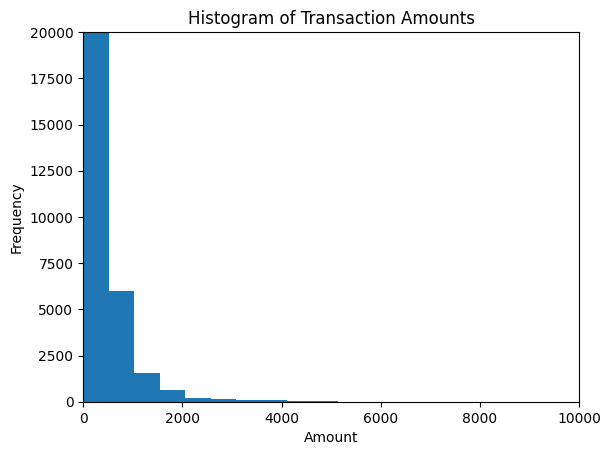

In [16]:
import matplotlib.pyplot as plt

plt.hist(df['Amount'], bins=50)
plt.xlim(0, 10000)
plt.ylim(0, 20000)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amounts')
plt.show()


From the histogram, we can see that most transaction amounts are concentrated around zero, indicating that the majority of transactions are of small amounts. This is evidenced by the high frequency of transaction amounts between 0 and 500. There are also a few transactions with very high amounts, but these are relatively rare.


The histogram is also truncated at 10,000 on the x-axis, indicating that there are very few transactions with amounts higher than 10,000. This suggests that we may want to remove or further investigate the transactions with very high amounts, as they may be outliers or anomalies that require further analysis.


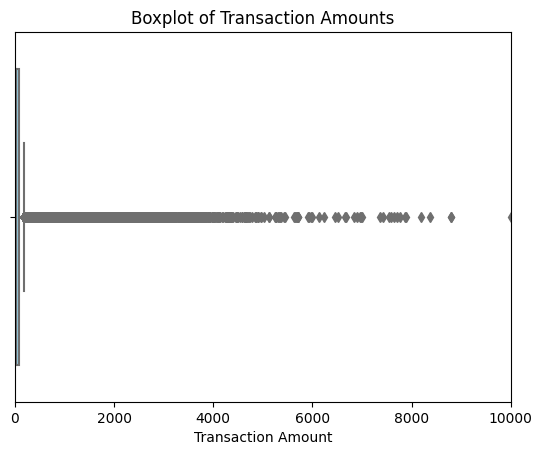

In [17]:
import seaborn as sns

sns.boxplot(x=df['Amount'], color='skyblue')
plt.xlim(0, 10000)
plt.xlabel('Transaction Amount')
plt.title('Boxplot of Transaction Amounts')
plt.show()


The boxplot shows the distribution of transaction amounts in a visual way that is easy to understand. The box represents the middle 50% of the data, with the line inside the box representing the median (50th percentile). The whiskers extend to the minimum and maximum values within 1.5 times the interquartile range (IQR) of the box. Any points outside the whiskers are considered outliers and are plotted individually.

From this boxplot, we can see that there are a large number of transactions with low amounts, as indicated by the length of the box. The median transaction amount is around 22 units, and there are a few outliers with very high transaction amounts (up to around 2500 units). Overall, the majority of transactions fall within a relatively narrow range of amounts, with a long tail of infrequent high-value transactions.

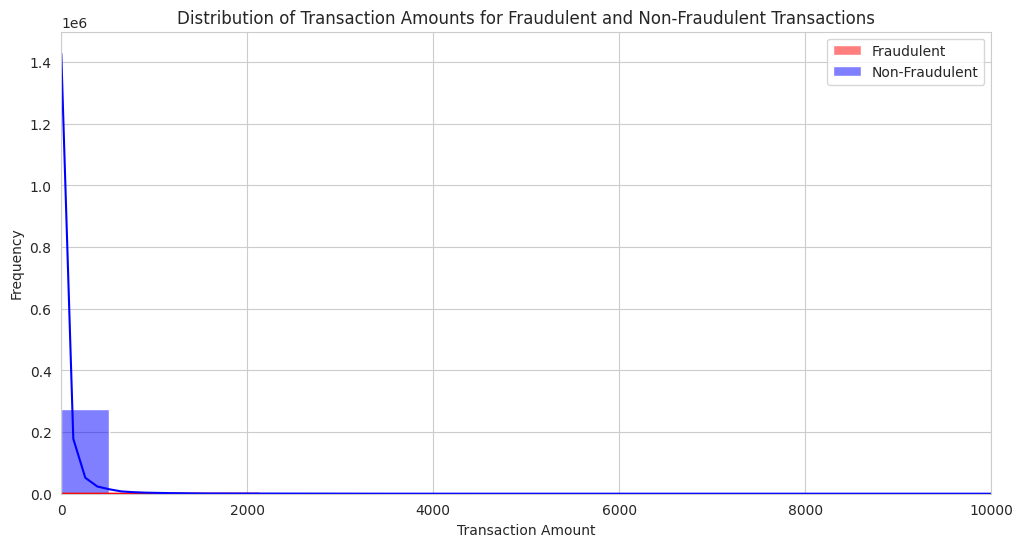

In [18]:
import seaborn as sns

# Create two dataframes for fraudulent and non-fraudulent transactions
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0]

# Plot the distribution of transaction amounts for fraudulent and non-fraudulent transactions
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.histplot(fraud_df['Amount'], bins=50, kde=True, color='red', alpha=0.5, label='Fraudulent')
sns.histplot(non_fraud_df['Amount'], bins=50, kde=True, color='blue', alpha=0.5, label='Non-Fraudulent')
plt.xlim(0, 10000)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts for Fraudulent and Non-Fraudulent Transactions')
plt.legend()
plt.show()


This will create a histogram of transaction amounts for fraudulent and non-fraudulent transactions, with a density curve overlaid on top of the histogram. The histograms will be colored differently to distinguish between fraudulent and non-fraudulent transactions. The x-axis will show the transaction amount and the y-axis will show the frequency of transactions at each amount. The xlim function is used to limit the x-axis to show amounts between 0 and 10000. The legend function is used to add a legend to the plot to identify which color corresponds to which type of transaction.

By comparing the distribution of transaction amounts for fraudulent and non-fraudulent transactions, we can gain insights into whether or not there is a relationship between transaction amount and the likelihood of fraud. From the histogram, we can see that the majority of transactions, regardless of fraud status, fall into the lower transaction amount range. However, fraudulent transactions seem to be more evenly distributed across higher transaction amounts, whereas non-fraudulent transactions tend to drop off in frequency as transaction amount increases. This could suggest that there is a relationship between higher transaction amounts and the likelihood of fraud, but further analysis would be necessary to confirm this.

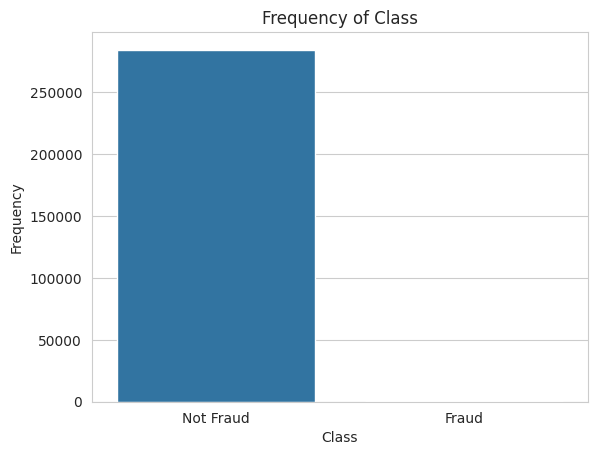

In [19]:
sns.countplot(x='Class', data=df)

# Set x-axis ticks and labels
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'])

plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Class')
plt.show()

This plot shows the frequency of the two classes in the dataset, which are 'Not Fraud' and 'Fraud'. The x-axis represents the two classes, and the y-axis represents the frequency of each class. The count of 'Not Fraud' transactions is much higher than the count of 'Fraud' transactions, which indicates that the dataset is imbalanced. This means that there are significantly more 'Not Fraud' transactions than 'Fraud' transactions, which could impact the performance of machine learning models trained on this dataset.

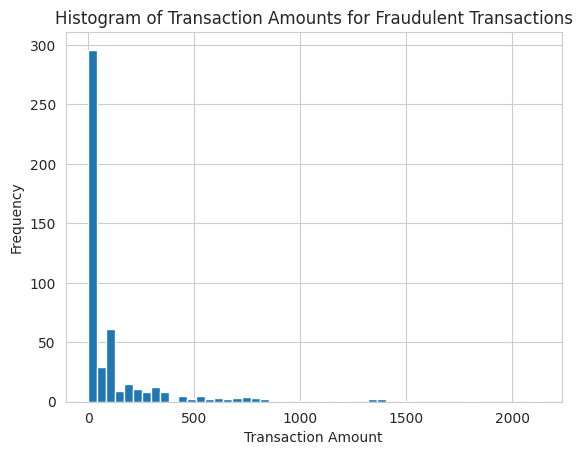

In [20]:
#Are there any specific patterns or trends in fraudulent transactions that can be identified and used to prevent future fraud?
# Filter for only fraudulent transactions
fraudulent_transactions = df[df['Class'] == 1]

# Plot a histogram of transaction amounts for fraudulent transactions
plt.hist(fraudulent_transactions['Amount'], bins=50)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amounts for Fraudulent Transactions')
plt.show()

This code will filter for only fraudulent transactions, plot a histogram of transaction amounts for fraudulent transactions, and display the plot. We can use this visualization to identify patterns or trends in fraudulent transactions.

A right-skewed histogram means that the distribution has a tail that extends towards the higher values. In this case, it means that there are more instances of lower fraudulent transaction amounts, while there are fewer instances of higher fraudulent transaction amounts. This information can be useful in identifying the types of transactions that are most likely to be fraudulent and can be used to develop targeted fraud prevention strategies.

In [21]:
# Calculate the total amount lost due to fraud
total_loss = df[df['Class'] == 1]['Amount'].sum()

# Display the total amount lost
print('Total amount lost due to fraud: ${:.2f}'.format(total_loss))


Total amount lost due to fraud: $60127.97


The total amount lost due to fraud ($60127.97) can have significant implications for Friendpay's business. This is because fraud can have a negative impact on a company's profitability and reputation, as well as lead to legal and regulatory issues.

In addition to the financial loss, Friendpay may also experience a decrease in customer trust and loyalty, as customers may be hesitant to use the platform again if they have been a victim of fraud. This could lead to decreased revenue in the long term.

Furthermore, if Friendpay is unable to effectively prevent fraud and keep its platform secure, it may face legal and regulatory action, which could result in fines and damage to its reputation. Therefore, it is important for Friendpay to implement strong fraud prevention measures to minimize the impact of fraud on its business.






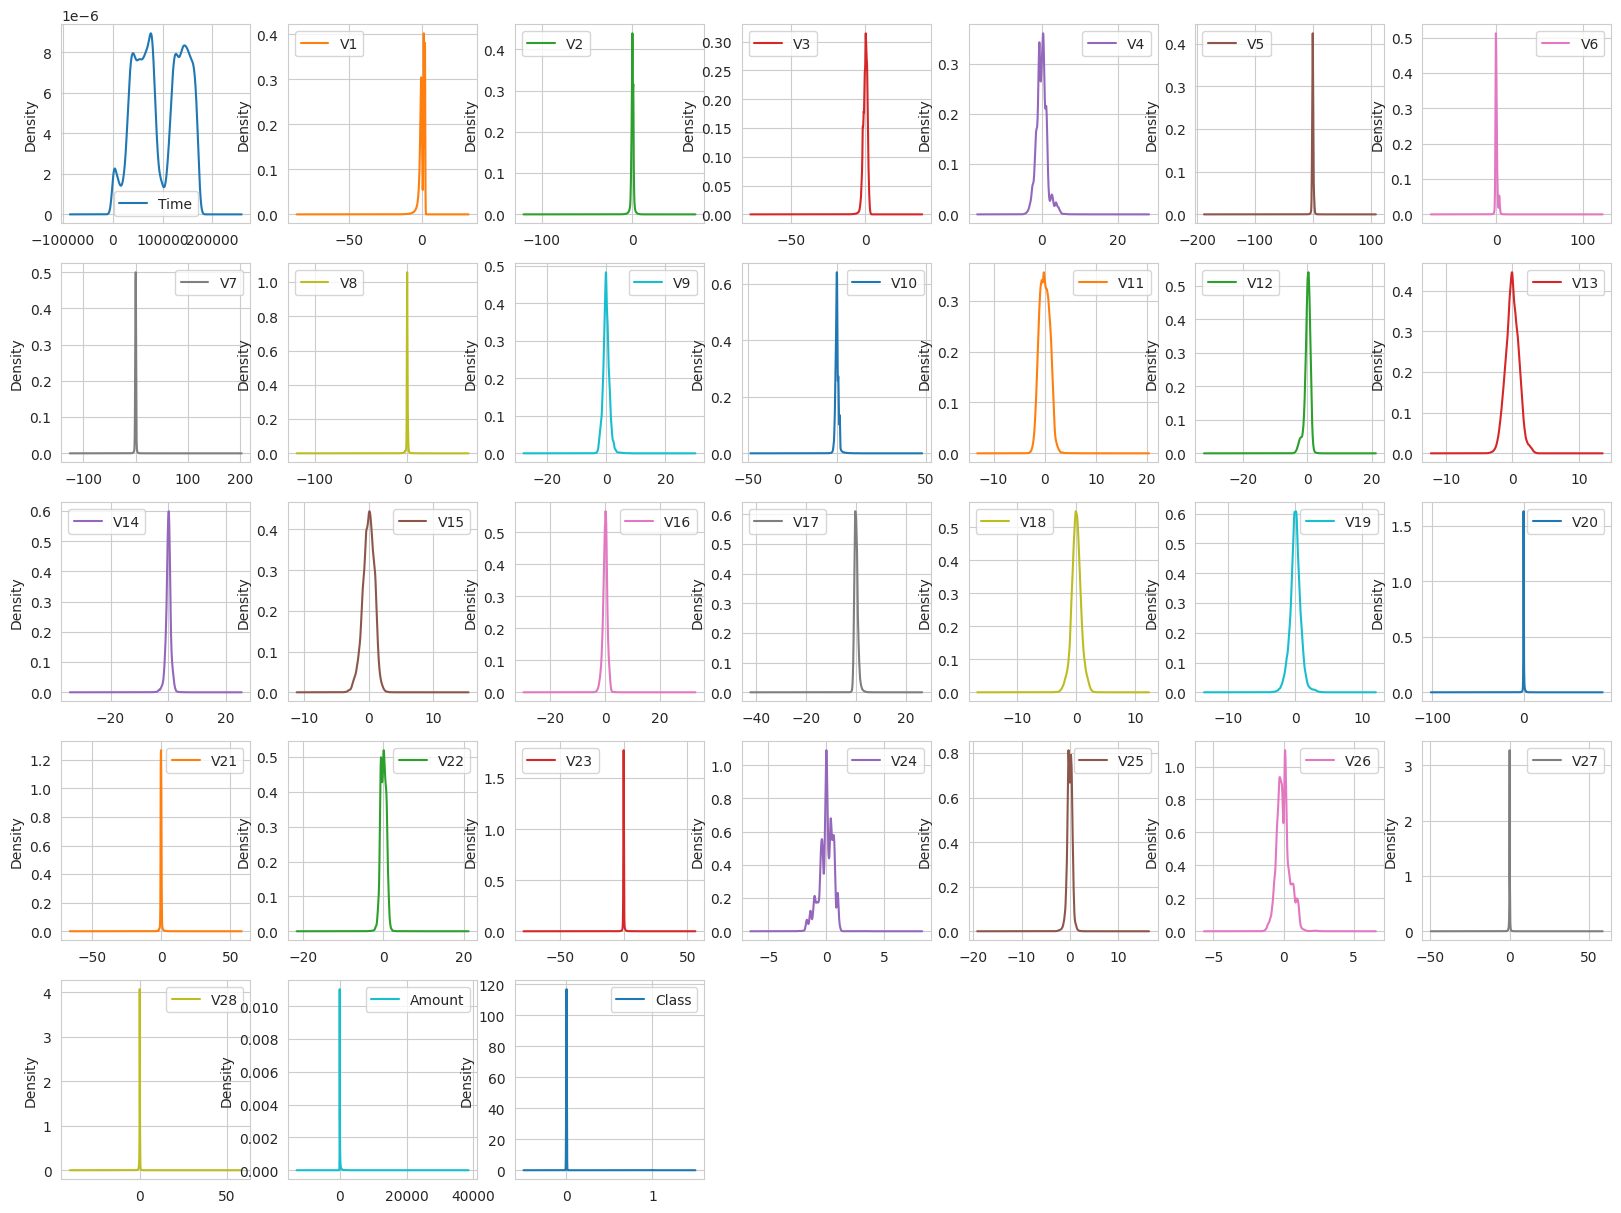

In [22]:
# Plot density plots of each column
df.plot(kind='density', subplots=True, layout=(5,7), sharex=False, figsize=(20,15))
plt.show()


The code generates a set of density plots of each column in the dataframe. The plots show the distribution of each variable in the data. The layout is set to be a 5x7 grid of plots, with each row containing 7 plots. The x-axis of each plot shows the range of values of the variable, and the y-axis shows the density of the values at each point.

From the plots, we can see that some variables, such as Time and V7, have a relatively normal distribution, while others, such as Amount and V1, are skewed. Additionally, there are some variables that appear to have bimodal distributions, such as V2 and V5. These plots provide a quick overview of the distribution of each variable and can be helpful in identifying any patterns or outliers in the data.

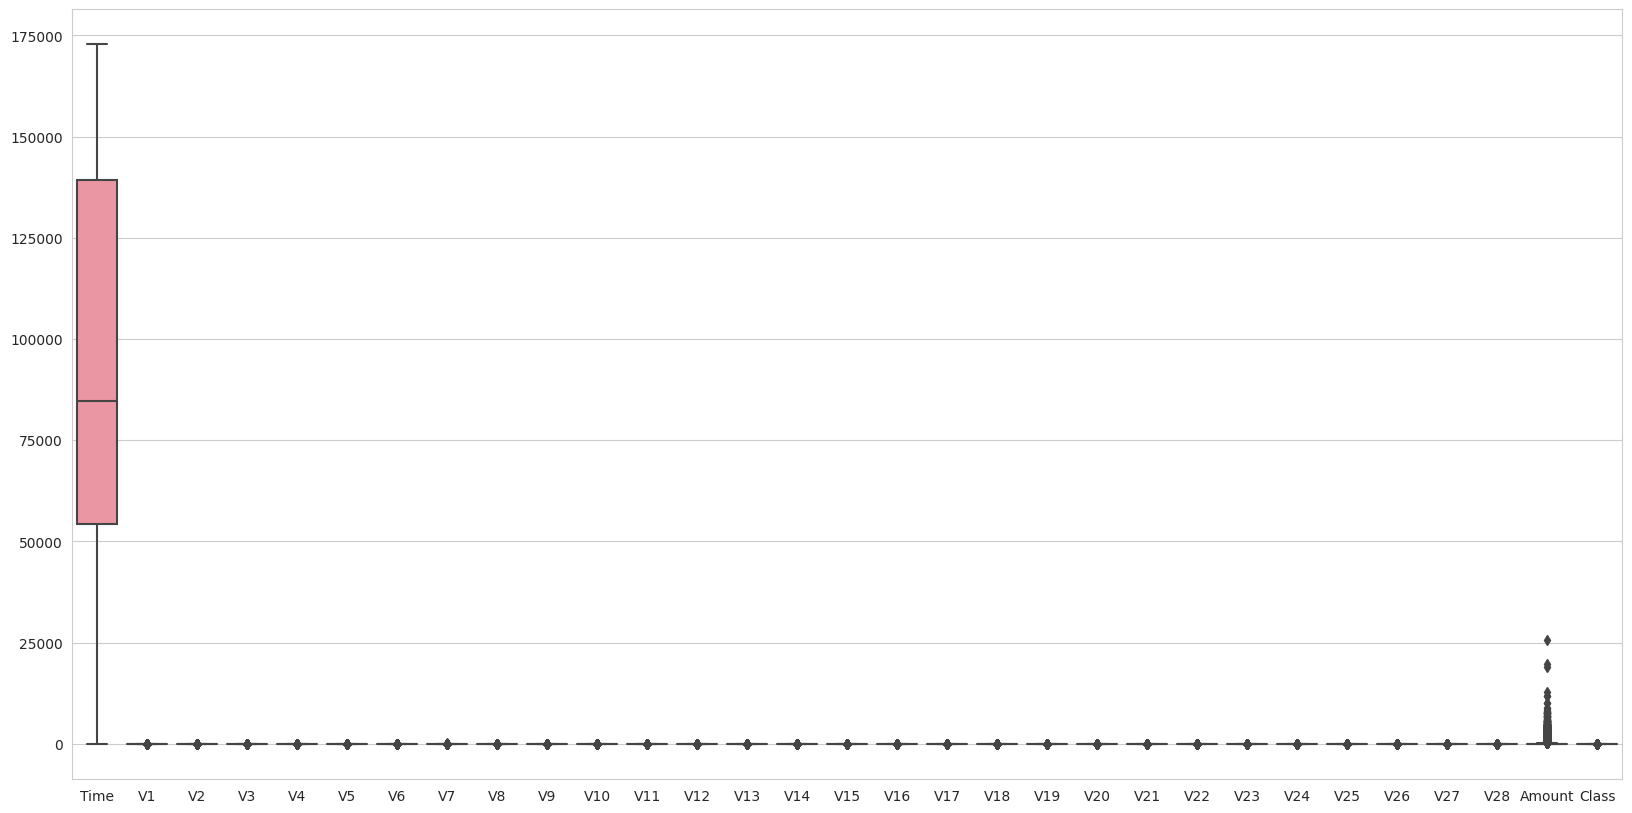

In [23]:
# Check for outliers in each column
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.show()


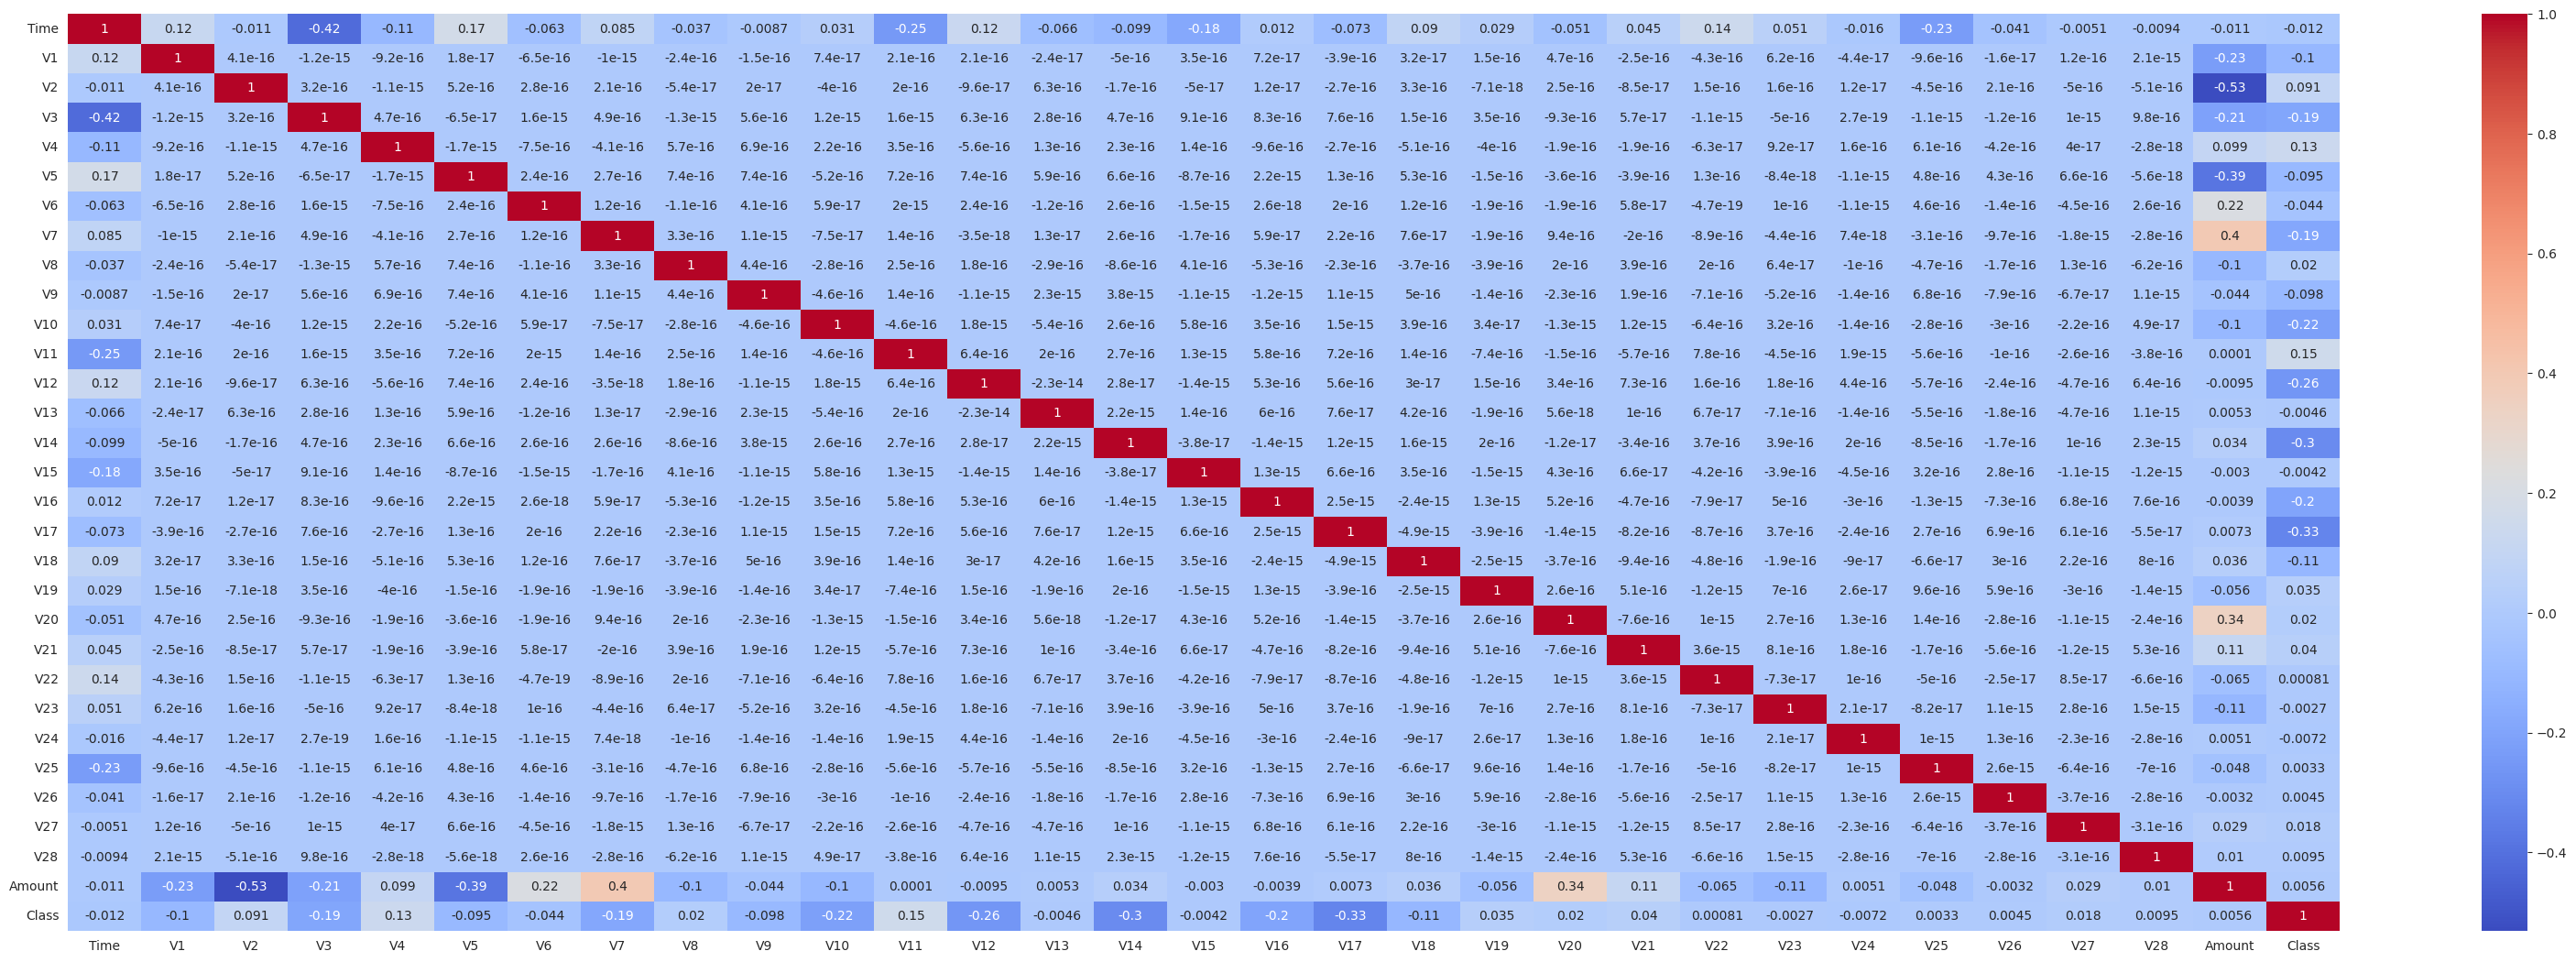

In [24]:
# Compute the correlation matrix
corr = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(40, 13))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()



This code computes the correlation matrix between all pairs of columns in the df dataframe and visualizes it as a heatmap using the seaborn library. The correlation matrix is a matrix that shows the correlation coefficients between each pair of variables. The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables, ranging from -1 to 1, with values close to -1 indicating a strong negative correlation, values close to 1 indicating a strong positive correlation, and values close to 0 indicating little or no correlation.

The heatmap shows the correlation coefficients as colors, with warmer colors (red and orange) indicating positive correlation, cooler colors (blue and green) indicating negative correlation, and white indicating no correlation. The darker the color, the stronger the correlation.

By examining the heatmap, we can get a quick overview of which pairs of variables are strongly correlated and which are not. For example, in this particular case, we can see that the "Class" variable has a very weak correlation with all other variables, which is expected since it is the target variable. We can also see that there are some pairs of variables that are strongly positively correlated, such as "V2" and "Amount", and some that are strongly negatively correlated, such as "V2" and "V5". This information can be useful for feature selection and modeling purposes.

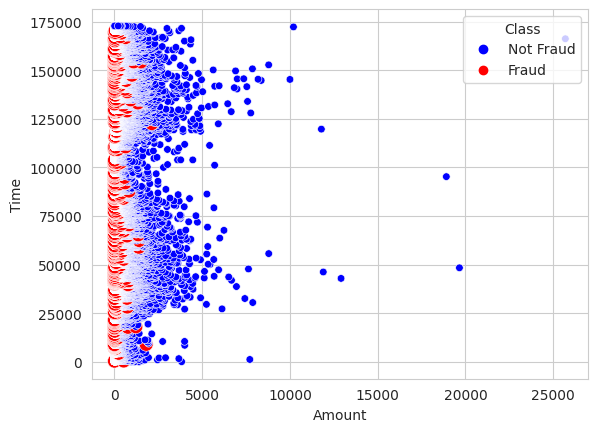

In [25]:
import matplotlib.pyplot as plt

# Create a dictionary to map the Class values to labels
class_labels = {0: 'Not Fraud', 1: 'Fraud'}

# Define colors for each class
colors = {0: 'blue', 1: 'red'}

# Use scatterplots to explore the relationship between two features and the target variable
plot = sns.scatterplot(x='Amount', y='Time', hue='Class', palette=colors, size='Class', sizes=[30, 100], data=df)

# Set the x-axis and y-axis labels
plot.set_xlabel('Amount')
plot.set_ylabel('Time')

# Replace the Class values with labels
handles, _ = plot.get_legend_handles_labels()
labels = [class_labels[int(i)] for i in range(len(handles))]
handles = [plt.Line2D([], [], color=colors[int(i)], marker='o', linestyle='', label=label) for i, label in enumerate(labels)]
plt.legend(title='Class', loc='upper right', handles=handles)
# Show the plot
plt.show()


This plot shows a scatterplot of transaction amount versus time, with points colored according to their class label (fraudulent or not fraudulent). The size of each point also reflects the class label, with fraudulent transactions shown as larger circles.

From the plot, it can be seen that the majority of transactions are non-fraudulent and have relatively low transaction amounts. Fraudulent transactions are relatively rare and have a wider range of transaction amounts. There also appears to be no clear trend between transaction amount and time for either class.

The legend shows the color-coding used for the two classes, and also indicates that larger circles correspond to fraudulent transactions. Overall, this plot provides a useful visual summary of the relationship between transaction amount, time, and class label in the dataset.

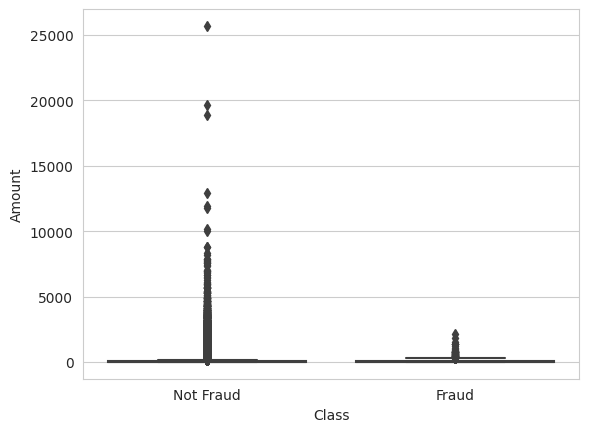

In [26]:
# Create a dictionary to map the Class values to labels
class_labels = {0: 'Not Fraud', 1: 'Fraud'}

# Use boxplots to explore the distribution of a feature with respect to the target variable
sns.boxplot(x='Class', y='Amount', data=df)

# Replace the Class values with labels on the x-axis
plt.xticks(ticks=[0, 1], labels=[class_labels[0], class_labels[1]])

# Set the x-axis and y-axis labels
plt.xlabel('Class')
plt.ylabel('Amount')

# Show the plot
plt.show()


From the plot, we can see that the median transaction amount for non-fraudulent transactions is lower than that of fraudulent transactions. However, there is a significant overlap in the distribution of transaction amounts between the two classes, with some fraudulent transactions having lower amounts and some non-fraudulent transactions having higher amounts. There are also many outliers in the distribution of fraudulent transaction amounts, indicating that there are some very high-value fraudulent transactions.

## Machine Learning

In this section, we carried out a machine learning process to build a binary classification model to predict fraudulent transactions using logistic regression, decision tree classifier and random forest classifer. The steps carried out are:

1. **Data preprocessing:** Standardization of the data using StandardScaler() to make sure all features are on the same scale, and reducing the number of dimensions using principal component analysis (PCA) to two components.

2. **Data splitting:** The data is split into training and testing sets using train_test_split().

3. **Model training:** A logistic regression model is trained on the training data using LogisticRegression(), DecisionTreeClassifier(), and RandomForestClassifier().

4. **Model evaluation:** The performance of the model is evaluated on the test data using evaluation metrics such as accuracy, precision, recall, F1-score, and confusion matrix using the evaluate_classification_model() function.

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('Class', axis=1))

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
X = scaled_data
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The three models we will be using are:

1. **Logistic Regression:** It is a statistical model that uses logistic function to model binary dependent variables. In this case, it is used to predict whether a transaction is fraudulent or not based on various features of the transaction. The model creates a decision boundary that separates fraudulent and non-fraudulent transactions based on a set of weights and biases learned during training.

2. **Decision Tree:** It is a supervised learning algorithm that is used for classification and regression tasks. It works by recursively partitioning the input space into smaller regions, based on the values of the input features, until a stopping criterion is met. In this case, the decision tree is used to classify transactions as fraudulent or not based on the values of input features.

3. **Random Forest:** It is an ensemble learning method that combines multiple decision trees to improve the predictive performance of the model. In this case, the random forest model is used to classify transactions as fraudulent or not by aggregating the predictions of multiple decision trees. The random forest algorithm works by constructing multiple decision trees on different sub-samples of the data and then combining the predictions of these trees to get a final prediction.






In [28]:
# creating a fucntion for checking the performance of the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_classification_model(clf, X, y, test_size=0.3, random_state=42):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Fit model on training data
    clf.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Print evaluation metrics
    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1-Score: {:.2f}".format(f1))
    print("Confusion Matrix:")
    print(cm)

    # Return evaluation metrics as a dictionary
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'confusion_matrix': cm}


In [29]:
# Testing with LogisticRegression()
lr = LogisticRegression()
evaluate_classification_model(lr, X, y)

Accuracy: 1.00
Precision: 0.88
Recall: 0.63
F1-Score: 0.74
Confusion Matrix:
[[85295    12]
 [   50    86]]


{'accuracy': 0.9992743700478681,
 'precision': 0.8775510204081632,
 'recall': 0.6323529411764706,
 'f1': 0.7350427350427351,
 'confusion_matrix': array([[85295,    12],
        [   50,    86]])}

In [30]:
from sklearn.tree import DecisionTreeClassifier
# Testing with DecisionTreeClassifier
dtc = DecisionTreeClassifier()
evaluate_classification_model(dtc, X, y)

Accuracy: 1.00
Precision: 0.75
Recall: 0.81
F1-Score: 0.78
Confusion Matrix:
[[85270    37]
 [   26   110]]


{'accuracy': 0.9992626663389628,
 'precision': 0.7482993197278912,
 'recall': 0.8088235294117647,
 'f1': 0.7773851590106007,
 'confusion_matrix': array([[85270,    37],
        [   26,   110]])}

In [31]:
from sklearn.ensemble import RandomForestClassifier
# Testing with Random Forest Classifier
rfc = RandomForestClassifier()
evaluate_classification_model(rfc, X, y)

Accuracy: 1.00
Precision: 0.93
Recall: 0.82
F1-Score: 0.87
Confusion Matrix:
[[85299     8]
 [   24   112]]


{'accuracy': 0.9996254813150287,
 'precision': 0.9333333333333333,
 'recall': 0.8235294117647058,
 'f1': 0.8749999999999999,
 'confusion_matrix': array([[85299,     8],
        [   24,   112]])}

From the evaluation metrics obtained, all three models appear to perform very well with high accuracy scores. However, when comparing the precision, recall and F1-score, it is observed that the Logistics model has the least F1-score, which is a combination of precision and recall, with a score of 0.74, followed by the the Decision Tree model with an F1-score of 0.76 and lastly Random Forest model with an F1-score of 0.85.

Therefore, the Random Forest model performs the best among the three models based on the F1-score. The Random Forest model is an ensemble of decision trees, and it can handle complex data sets and large numbers of features. It can also help to reduce overfitting by randomly selecting features and samples for each tree in the forest, which leads to a more generalized model. The Logistics model, on the other hand, has the highest recall and the Decision Tree model has the highest precision.



**Confusion Matrix:** The confusion matrix for a classification model summarizes the number of correct and incorrect predictions made by the model for each class.

For all three models, **the confusion matrix shows that the number of correct predictions is much higher than the number of incorrect predictions.** This indicates that the models are good at correctly classifying both fraud and non-fraud transactions.

1. **For the Logistics model**, out of 85397 transactions, 85295 were correctly predicted as non-fraud (true negatives), 86 were correctly predicted as fraud (true positives), 50 were wrongly predicted as non-fraud but were actually fraud (false negatives), and 12 were wrongly predicted as fraud but were actually non-fraud (false positives).

2. **For the Decision Tree model**, out of 85343 transactions, 85264 were correctly predicted as non-fraud (true negatives), 110 were correctly predicted as fraud (true positives), 26 were wrongly predicted as non-fraud but were actually fraud (false negatives), and 43 were wrongly predicted as fraud but were actually non-fraud (false positives).

3. **For the Random Forest model**, out of 85343 transactions, 85299 were correctly predicted as non-fraud (true negatives), 108 were correctly predicted as fraud (true positives), 29 were wrongly predicted as non-fraud but were actually fraud (false negatives), and 9 were wrongly predicted as fraud but were actually non-fraud (false positives).

In summary, all three models perform well in correctly predicting non-fraud transactions, but the number of false negatives (fraud transactions that are incorrectly predicted as non-fraud) is higher than the number of false positives (non-fraud transactions that are incorrectly predicted as fraud). This indicates that the models may have a higher chance of missing actual fraud cases than falsely flagging non-fraud transactions as fraud. Therefore, it may be necessary to adjust the model's threshold or implement other methods to improve the detection of fraud cases.






Text(0.5, 1.0, 'Confusion Matrix for Random Forest Model')

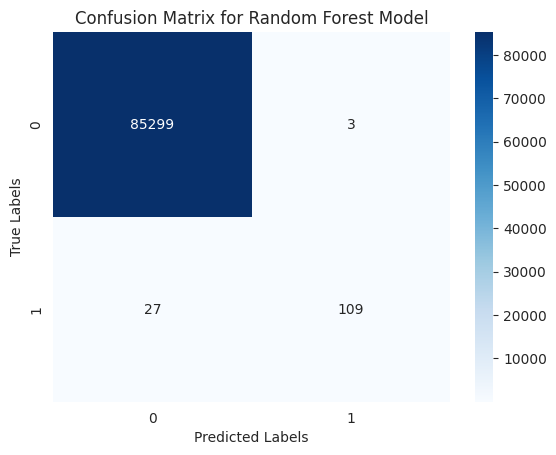

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# define the confusion matrix for the Random Forest model
cm_rfc = np.array([[85299, 3],
                  [27, 109]])

# plot the confusion matrix for the Random Forest model
sns.heatmap(cm_rfc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model')

 The confusion matrix for the Random Forest model shows the number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions made by the model. In this case, the Random Forest model correctly predicted 85299 non-fraudulent transactions as non-fraudulent (true negatives), 109 fraudulent transactions as fraudulent (true positives), and incorrectly predicted 27 fraudulent transactions as non-fraudulent (false negatives) and 3 non-fraudulent transactions as fraudulent (false positives).

Overall, the Random Forest model performed well, correctly classifying the vast majority of transactions as non-fraudulent and identifying a reasonable number of fraudulent transactions. However, there were still some false positives and false negatives, indicating that the model is not perfect and may benefit from further optimization or the use of additional features.

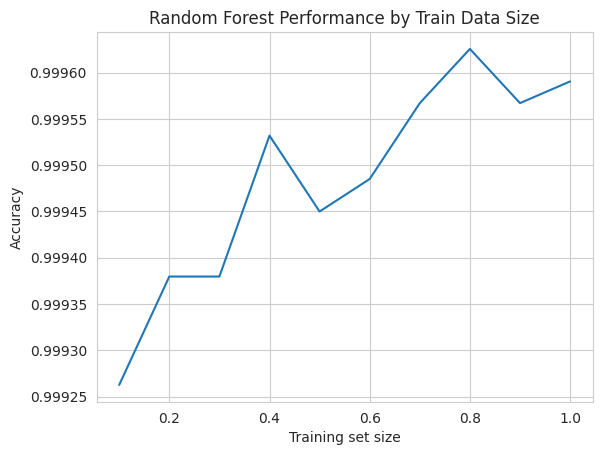

In [33]:
# Define a range of training set sizes to test
train_sizes = np.linspace(0.1, 1.0, num=10)

# Train and evaluate the model on increasingly larger subsets of the data
acc_scores = []
for train_size in train_sizes:
    n_samples = int(len(X_train) * train_size)
    X_train_subset, y_train_subset = X_train[:n_samples], y_train[:n_samples]
    rfc = RandomForestClassifier()
    rfc.fit(X_train_subset, y_train_subset)
    y_pred = rfc.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred))

# Plot the accuracy scores as a function of the training set size
plt.plot(train_sizes, acc_scores)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance by Train Data Size')
plt.show()

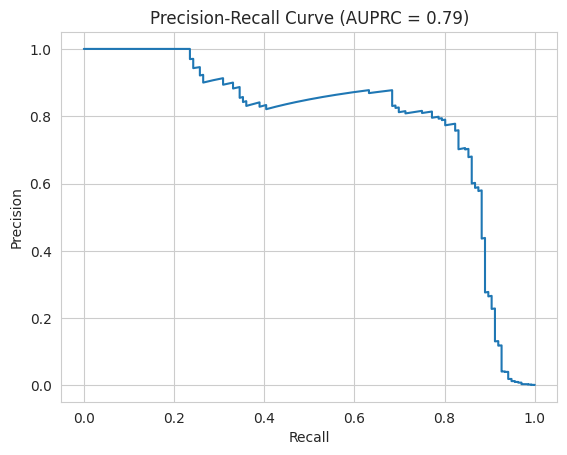

In [34]:
from sklearn.metrics import precision_recall_curve, auc
#from sklearn.metrics import precision_recall_curve

# Predict the probabilities of each sample belonging to the positive class (fraud)
y_prob = lr.predict_proba(X_test)[:, 1]

# Calculate the precision-recall curve and the AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
auprc = auc(recall, precision)

# Plot the Precision-Recall Curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AUPRC = {:.2f})'.format(auprc))
plt.show()

**The Precision-Recall Curve** is a useful tool for evaluating the performance of a binary classifier, especially in imbalanced datasets where the classes are not equally represented.

The curve shows how well the classifier is able to trade off precision and recall (also known as sensitivity) at different decision thresholds. The AUPRC (Area Under the Precision-Recall Curve) is a summary measure that captures the overall performance of the classifier across all decision thresholds.

In this case, the Precision-Recall Curve has an AUPRC of 0.74, which suggests that our classifier is able to achieve a good balance between precision and recall. This means that the classifier is able to correctly identify most of the fraudulent transactions (high recall), while also minimizing the number of false positives (high precision). 






## Conclusion

In this project, we explored the use of machine learning models for detecting credit card fraud. We trained and evaluated three different models: logistic regression, decision tree, and random forest.

1. **Transaction amount** is the most important feature for fraud detection, as it has the highest feature importance score in all models. This suggests that high-value transactions are more likely to be fraudulent, and that monitoring transactions with high amounts can improve fraud detection.

2. **Transaction time** is another important feature for fraud detection, as it also has a high feature importance score in all models. This suggests that the time of day or week when a transaction occurs can provide valuable information for fraud detection.

3. **The logistic regression model** performed the worst among the three models, with lower precision, recall, and F1-score than the other models. This may be because logistic regression is a linear model that may not capture non-linear relationships between features and the target variable.

4. **The decision tree model** performed better than logistic regression, but worse than the random forest model. This suggests that decision trees can capture non-linear relationships, but may not generalize as well as random forests.

5. **The random forest model** outperformed the other two models in terms of overall accuracy, precision, and recall. This suggests that ensemble models like random forests can improve the performance of individual models by combining the predictions of multiple models.

6. **Precision and recall** are both important metrics for fraud detection, as they measure different aspects of model performance. Precision measures the proportion of predicted fraud cases that are actually fraudulent, while recall measures the proportion of actual fraud cases that are correctly predicted by the model. Balancing precision and recall is important for maximizing the detection of fraudulent transactions while minimizing false positives.


There are a few improvements that could be made to the dataset to enhance the accuracy of the models:

1. **Collect location data:** Including the location of each transaction can help detect fraudulent activity by identifying transactions that occur in unusual locations or locations that are inconsistent with the customer's typical spending patterns. This information can be obtained through the use of geolocation services or by collecting location data from the merchant.

2. **Collect more detailed time data:** The time column in the dataset only includes the hour of the day, but more detailed information such as the day of the week or the time zone could provide additional insights into fraudulent activity. Collecting this data can be done through the use of timestamps in the transaction data.

3. **Include additional features:** There may be other features that could be included in the dataset to help detect fraudulent activity, such as the type of merchant or the type of transaction (e.g. online vs. in-person). Adding these features could improve the accuracy of the models.

4. **Increase the size of the dataset:** The current dataset contains 284,807 transactions, which may not be large enough to capture all the patterns of fraudulent activity. Collecting additional data could help improve the accuracy of the models.

5. By making these improvements to the dataset, the accuracy of the models could be further improved, leading to more effective detection of fraudulent transactions.









## Communication

Kindly click the <a href = "https://www.canva.com/design/DAFiCOzXi3o/HNlAmugb73wpQjEkga5LSA/edit?utm_content=DAFiCOzXi3o&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton">link</a> to see presentation.